<a href="https://colab.research.google.com/github/zzerross/ai/blob/main/rnn/sin/LSTMSinReference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Refer https://m.blog.naver.com/chunjein/222131850058
from tensorflow.keras import datasets, layers, models, optimizers
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['lines.markersize'] = 0.5
mpl.rcParams['lines.linewidth'] = 0.2

In [2]:
# 1차원 배열의 시계열 데이터로 학습용 배치 파일을 만든다. 입력값 = 1개, 출력값 = 1개
# return : xBatch - RNN 입력
#          yBatch - RNN 출력
#
# step = 3 인 경우의 예시
# xData = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
# 
# xBatch, yBatch는 3차원 텐서로 만든다. (-1, step=3, 1)
# xBatch = [[1]] [[2]] [[3]] [[4]] [[5]] [[6]] [[7]] --> 7 x 3 x 1
#          [[2]] [[3]] [[4]] [[5]] [[6]] [[7]] [[8]]
#          [[3]] [[4]] [[5]] [[6]] [[7]] [[8]] [[9]]
#
# yBatch =  [4]   [5]   [6]   [7]   [8]   [9]   [10] --> 7 x 1
#
# ex : xBatch[0] = [[3],[4],[5]],   yBatch[0] = [6]
#      3-step 짜리 LSTM에 3,4,5가 입력되면 6이 출력되도록 학습한다.
def make_sequence(input, timesteps):
  x = list(map(lambda x: input[x:x+timesteps], range(len(input) - timesteps)))
  y = input[timesteps:]
  return np.reshape(x, (-1, timesteps, 1)), np.reshape(y, (-1, 1))

def get_input(start, end, num):
  radians = np.linspace(start, end, num)
  sin = np.sin(radians) + np.random.random(num)
  return radians, sin

n = 1000
radians = 0.5 * np.arange(n)
data = get_input(-10, 10, n)[1]

input_dim = 1
nOutput = 1
timesteps = 20
hidden_units = 50

train_x, train_y = make_sequence(data[-800:], timesteps)
test_x, test_y = make_sequence(data[:-200:], timesteps)

In [3]:
def make_reference_model():
  xInput = layers.Input(batch_shape=(None, timesteps, 1))
  xLstm = layers.LSTM(hidden_units)(xInput)
  xOutput = layers.Dense(nOutput)(xLstm)
  model = models.Model(xInput, xOutput)
  model.compile(loss='mse', optimizer=optimizers.Adam(learning_rate=0.01))
  model.summary()
  return model
  
def make_model():
  model = models.Sequential()
  model.add(layers.Input(batch_shape=(None, timesteps, input_dim)))
  model.add(layers.LSTM(hidden_units))
  model.add(layers.Dense(1))
  model.compile(optimizers.Adam(0.01), loss='mse')
  model.summary()
  return model
# model = make_reference_model()
model = make_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


25/25 [==============================] - 2s 10ms/step - loss: 0.2043


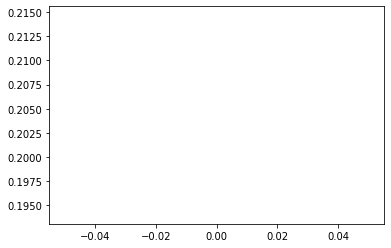

In [4]:
history = model.fit(train_x, train_y) # epochs=100, batch_size=100, shuffle=True, verbose=0)
plt.plot(history.history['loss'])

In [5]:
predicted_y = model.predict(test_x)

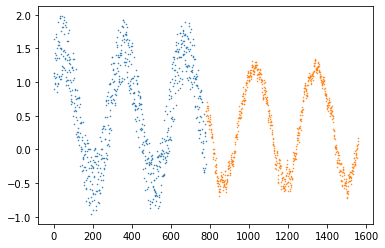

In [6]:
plt.scatter(np.arange(len(train_y)), train_y)
plt.scatter(np.arange(len(train_y), len(train_y) + len(predicted_y)), predicted_y)